# 신경망 구현 using Tensorflow 1.x version

## 파라미터 값에 placeholder 할당 case

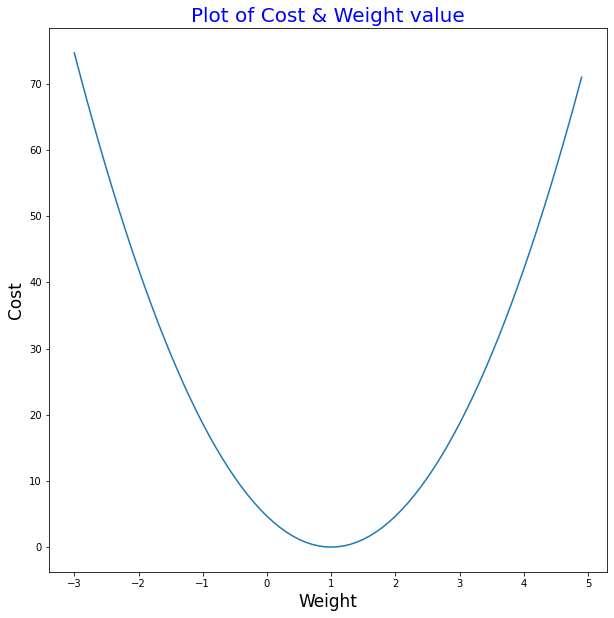

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

X = [1,2,3]
Y = [1,2,3]

# W는 값이 비어있는 placeholder로 할당
W = tf.placeholder(tf.float32)

# 선형식 정의
hypothesis = X * W

# cost값 정의
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# SGD 함수 사용하지 않고 직접 python으로 구현
with tf.Session() as sess:
    # plot그리기 위해서 W, b값 계속 축적해놓을 빈 리스트 할당
    W_val = []
    cost_val = []
    for i in range(-30, 50):
        # 반복문 돌려서 새로운 W값 반복적으로 설정
        feed_W = i * 0.1
        # 2개 이상 객체를 할당할 때 run함수에 리스트로 묶어주기, W는 현재 값이 비어있는 placeholder이기 때문에 feed_dict로 W에 값 할당
        curr_cost, curr_W = sess.run([cost, W], feed_dict={W : feed_W})
        W_val.append(curr_W)
        cost_val.append(curr_cost)
plt.figure(figsize=(10,10))
plt.plot(W_val, cost_val)
plt.title('Plot of Cost & Weight value', fontsize=20, color='blue')
plt.xlabel('Weight', fontsize=17)
plt.ylabel('Cost', fontsize=17)
plt.show()

## 파라미터값에 Variable 할당 case

In [9]:
import tensorflow as tf

X = [1,2,3]
Y = [4,5,6]

# W값은 계속 변화할 파라미터값이기 때문에 tf.Constant가 아닌 tf.Variable로 할당
W = tf.Variable(5.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))
# SGD 함수 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# cost를 SGD로 최소화시키도록 준비(최소화 수행은 run 단계에서 수행)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    # 위에서 설정한 초기값 파라미터를 run하기 위해 setting
    sess.run(tf.global_variables_initializer())
    for step in range(11):
        # W값 출력
        print(f"- 횟수:{step}: W값: {sess.run(W)}")
        sess.run(train)

- 횟수:0: W값: 5.0
- 횟수:1: W값: 2.4666664600372314
- 횟수:2: W값: 2.2977776527404785
- 횟수:3: W값: 2.2865185737609863
- 횟수:4: W값: 2.2857680320739746
- 횟수:5: W값: 2.2857179641723633
- 횟수:6: W값: 2.285714626312256
- 횟수:7: W값: 2.2857143878936768
- 횟수:8: W값: 2.2857141494750977
- 횟수:9: W값: 2.2857143878936768
- 횟수:10: W값: 2.2857141494750977


## SGD를 Python으로 직접 구현하는 case

In [20]:
import tensorflow as tf

x_data = [1,2,3]
y_data = [10,12,14]

# 1차원의 벡터로 랜덤한 값을 변수로 할당
W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# SGD를 python으로 구현하기
learning_rate = 0.1
# gradient: cost값을 미분하여 평균취한 값 - 이때, 상수 2배는 안해주어도 상관없음
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
# 업데이트된 W값을 새로운 변수에 할당(.assign함수는 tf.Variable 객체의 함수 종류 중 하나)
update = W.assign(descent)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(21):
        # W값을 SGD방식으로 업데이트 시켜주면서 X, Y값에 x_data, y_data feed시키기
        sess.run(update, feed_dict={X: x_data, Y: y_data})
        # cost출력시키기 위해서 run시켜주면서 X,Y에 데이터 feed 시키기
        print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
        print('-'*50)


0 30.506462 [3.288965]
--------------------------------------------------
1 15.219617 [4.287448]
--------------------------------------------------
2 10.871358 [4.819972]
--------------------------------------------------
3 9.63452 [5.1039853]
--------------------------------------------------
4 9.282708 [5.255459]
--------------------------------------------------
5 9.182637 [5.3362446]
--------------------------------------------------
6 9.154174 [5.3793306]
--------------------------------------------------
7 9.146076 [5.4023094]
--------------------------------------------------
8 9.143771 [5.414565]
--------------------------------------------------
9 9.143119 [5.4211016]
--------------------------------------------------
10 9.142932 [5.4245872]
--------------------------------------------------
11 9.142878 [5.4264464]
--------------------------------------------------
12 9.142863 [5.4274383]
--------------------------------------------------
13 9.142859 [5.427967]
---------------

## 2차원 이상 input, output shape 맞추는 case

In [37]:
import tensorflow as tf

x_data = [[73, 93, 75],
         [93, 88, 93],
         [89, 91, 90],
         [96, 98, 100],
         [73, 66, 70]]
y_data = [[152], [185], [180], [196], [142]]

# shpae=[None, 3] : 행(데이터) 개수는 유동적으로 바뀌도록, feature(column) 개수는 3개
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

# W값은 3개의 요소로 이루어져 있는 2차원 column vector임. 왜냐하면 1행 3열의 행 벡터의 X와 내적해주려면 W는 3행 1열의 열 벡터이기 때문
# 위 두개의 내적결과 2차원으로 이루어진 요소가 1개인 벡터. Ex. [[15]] 이런식..
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
# 위 W값의 shape인 요소가 1개인 2차원 array와 1차원 array와 더하기는 가능!(내적 시에만 shape를 맞춰줘야 함!)
b = tf.Variable(tf.random_normal([1]), name='bias')

# matmul인자가 바뀌면 안 됨! 행 벡터와 열 벡터 순의 내적이 되어야 요소가 1개인 벡터값으로 도출
hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        # train은 출력하진 않지만 run은 시켜야 하므로 _(언더스코어를 사용해) 변수 할당
        cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                      feed_dict={X: x_data, Y: y_data})
        if step % 20 == 0:
            print(step, 'Cost: ', cost_val, '\nPrediction:\n', hy_val)
            print('-'*50)

0 Cost:  29678.09 
Prediction:
 [[346.9457 ]
 [351.7958 ]
 [356.94824]
 [385.81345]
 [265.3935 ]]
--------------------------------------------------
20 Cost:  325.47614 
Prediction:
 [[186.82289]
 [171.1822 ]
 [178.62143]
 [191.70076]
 [127.73706]]
--------------------------------------------------
40 Cost:  311.72818 
Prediction:
 [[186.08377]
 [171.48376]
 [178.641  ]
 [191.7809 ]
 [128.05005]]
--------------------------------------------------
60 Cost:  298.56168 
Prediction:
 [[185.36151]
 [171.78008]
 [178.66138]
 [191.8606 ]
 [128.35724]]
--------------------------------------------------
80 Cost:  285.95148 
Prediction:
 [[184.65466]
 [172.07004]
 [178.6813 ]
 [191.93861]
 [128.65787]]
--------------------------------------------------
100 Cost:  273.87396 
Prediction:
 [[183.9629 ]
 [172.35384]
 [178.7008 ]
 [192.01495]
 [128.95207]]
--------------------------------------------------
120 Cost:  262.30695 
Prediction:
 [[183.28592]
 [172.63155]
 [178.7199 ]
 [192.0897 ]
 [129.23

1440 Cost:  15.320749 
Prediction:
 [[159.72343]
 [182.29541]
 [179.38414]
 [194.70242]
 [139.24782]]
--------------------------------------------------
1460 Cost:  14.679637 
Prediction:
 [[159.56398]
 [182.36078]
 [179.38864]
 [194.72032]
 [139.3153 ]]
--------------------------------------------------
1480 Cost:  14.06566 
Prediction:
 [[159.40793]
 [182.42474]
 [179.393  ]
 [194.7378 ]
 [139.38135]]
--------------------------------------------------
1500 Cost:  13.477595 
Prediction:
 [[159.25523]
 [182.48735]
 [179.39735]
 [194.75499]
 [139.446  ]]
--------------------------------------------------
1520 Cost:  12.91436 
Prediction:
 [[159.10576]
 [182.5486 ]
 [179.40157]
 [194.77176]
 [139.50923]]
--------------------------------------------------
1540 Cost:  12.374931 
Prediction:
 [[158.95949]
 [182.60855]
 [179.40567]
 [194.7882 ]
 [139.57112]]
--------------------------------------------------
1560 Cost:  11.8582945 
Prediction:
 [[158.81633]
 [182.6672 ]
 [179.40971]
 [194.80

---
array간 덧셈은 차원이 달라도 가능!

In [25]:
import numpy as np
a = np.array([[1],[2],[3]])
a.shape

(3, 1)

In [28]:
b = np.array([[1,2,3]])
print(b.shape)
print(b)

(1, 3)
[[1 2 3]]


In [35]:
np.dot(b,a) + np.array([1,2])

array([[15, 16]])

In [34]:
np.array([1]).shape

(1,)